# Credit Card Fraud Detection

# Loading the csv file

In [7]:
import pandas as pd

df = pd.read_csv('data/creditcard.csv.zip', compression='zip')
df.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


# Data Preprocessing and class imbalance Handling

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
# from scikit-learn : a popular machine learning library.
# preprocessing : preparing data.
# StandardScalar : a tool that scales numerical data so that it has a mean 0 and a standard deviation of 1.
from sklearn.model_selection import train_test_split
# model_selecton : part of skilearn helps with splitting and evaluating models.
# train_test_split : splits your dataset into training and testing portions.

# SCALE THE AMOUNT AND TIME COLUMNS 

df['scaled_amount'] = StandardScaler().fit_transform(df[['Amount']])
# df['scaled_amount'] : creating a new column called scaled_amount in the dataframe df.
# StandardScalar() : creates a scalar object.
""" .fit_transform(...) :
       fit : calculates mean & standard deviation of the data.
       tranform : applies the scaling using those values """
# df.[['Amount']] : selects the colums Amount (double [[]] makes it a dataframe not a series)
df['scaled_time'] = StandardScaler().fit_transform(df[['Time']])

# DROP THE ORIGINAL COLUMNS

df.drop(['Amount', 'Time'], axis=1, inplace=True)

# drop([...]) : removes the listed columns.
# axis=1 : means you're dropping columns(not rows).
# inplace=True : apply the change directly to df (don't create a copy).

scaled_amount = df.pop('scaled_amount')

# pop() : removes the column from df and returns it.
# We're saving it into a variable so we can move it to the front.

scaled_time = df.pop('scaled_time')
df.insert(0,'scaled_amount', scaled_amount)
# insert(position, column_name, data) : adds column back into the dataframe.

df.insert(1, 'scaled_time', scaled_time)

#Split features and labels

x = df.drop('Class', axis=1)
# x : holds features(input variaables)
# df. drop('Class', axis=1) : removes the class column from the df to create x

y = df['Class']

# Split the data for training and testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify=y)

''' Undersampling '''

# x_train/ x_test : features for training and testing
# y_train/ y_test : corresponding labels(fraud/not fraud)
# test_size = 0.2 : 20% of data is used for testing, 80% is used for training.
# random_split = 42 : Ensures you get the same split every time 
# startify = y : keeps the same proportion of fraud vs non-fraud in both training and test sets.

print("Original training set shape: ", x_train.shape)
# Shows how many rows and columns are there in the training data.

print("Original class distribution: \n", y_train.value_counts())
# y_train.value_counts() : tells how many 0s and 1s(non-fraud and fraud) are in your training labels.



Original training set shape:  (227845, 30)
Original class distribution: 
 Class
0    227451
1       394
Name: count, dtype: int64


# Handle Imbalanced Data with Undersampling

I want my model to see an equal number of fraud and non-fraud transaction in the training
Right now it's 227451 non-fraud transaction and only 394 fraud transaction.
That's heavily imbalanced.
If I train my model on this, it will think: "Oh, it's almost always non-fraud. I'll just say 0 every time."

In [11]:
train_df = pd.concat([x_train, y_train], axis=1)
# concat : joins datasets

fraud = train_df[train_df['Class'] == 1]
non_fraud = train_df[train_df['Class'] == 0]
# 'Class == 1 : Selects only fraud transactions'
# 'Class == 0 : Selects only non-fraud transactions'

""" Undersample non-fraud to match fraud """

non_fraud_sample = non_fraud.sample(n=len(fraud), random_state=42)
# .sample(...) : Randomly pick rows from non_fraud.
# n=len(fraud) : Pick the same number of rows as fraud(i.e., 394)
# random_sate=42 : Ensures results dtay the same every run

"""Combine both into a balanced dataset"""

undersampled_df = pd.concat([fraud, non_fraud_sample])

"""Shuffle the dataset randomly """

undersampled_df = undersampled_df.sample(frac=1, random_state = 42)
#.sample(frac=1) : Shuffle all the rows (100% = 1.0)

"""Split into features and labels again """

x_train_balanced = undersampled_df.drop('Class', axis =1)
y_train_balanced = undersampled_df['Class']

# .drop('Class', axis = 1) : Remove the 'Class' column to get only features.
# ['Class'] : Select only the 'Class' colums as labels.
# x_train_balanced/ y_train_labels : Balanced training features and labels.

print("Balanced training set shape:", x_train_balanced.shape)
print("Class distribution:\n", y_train_balanced.value_counts())


Balanced training set shape: (788, 30)
Class distribution:
 Class
0    394
1    394
Name: count, dtype: int64


# Train a classifier using Logistic Regression 
Classifier is a mmachine learning model that learns how to categorize data into different classes or groups.

Think of it like a smart assistant that learns to answer : "Is this transaction fraud or not fraud?"

"Is the email content spam or not spam."

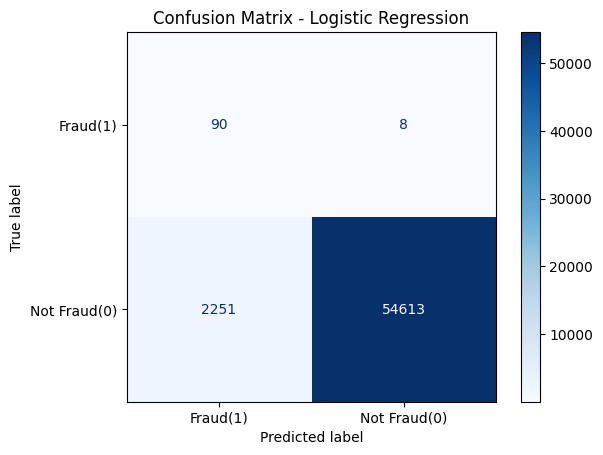

Classification Report:

              precision    recall  f1-score   support

           0     0.9999    0.9604    0.9797     56864
           1     0.0384    0.9184    0.0738        98

    accuracy                         0.9603     56962
   macro avg     0.5191    0.9394    0.5268     56962
weighted avg     0.9982    0.9603    0.9782     56962



In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# classification_report : The model I'm training.
# confusion_matrix : To see precision, recall, etc.
# confusion_report : Raw counts of predictions.
# ConfusionMatrixDisplay : Visualize predictons 
# matplotlib.pyplot : Helps display the matrix

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(x_train_balanced, y_train_balanced)
# max_iter=1000 : Give model enough time to learn.
# random _state = 42 : Ensures consistent results.
# fit(...) = This is where the learning happens

y_pred = log_reg.predict(x_test)
# Predict on the original test set.

cm = confusion_matrix(y_test, y_pred, labels=[1,0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fraud(1)", "Not Fraud(0)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
# Visulize the confusion matrix.

print("Classification Report:\n")
print(classification_report(y_test, y_pred, digits =4))
# precision : how many predicted frauds were correect?
# recall : how many actual frauds did we catch?
# f1-score : balanced score combining both.
# support : numberv of samples in each class


In [14]:
# True Positive(TP) = 90 : Actual frauds correctly predicted as fraud.
# False Negative(FN) = 8 : Actual frauds wrongly predicted as not fraud.(these are the most dangerous)
# False Positive(FP) = 2251 : Legit transaction wrongly predicted as fraud. (annoying for customers.)
# True Negative(TN) = 54,613 : Legit transactions correctly predicted as legit.


# Improving our model with SMOTE(Oversampling)
SMOTE - Synthetic Minority Oversampling Technique.
It generates synthetic examples of the minority class(fraud) insead of just duplicating them. This helps the model learn better patterns for detecting fraud.

After SMOTE oversampling
Fraud(1): 227451
Not Fraud(0): 227451


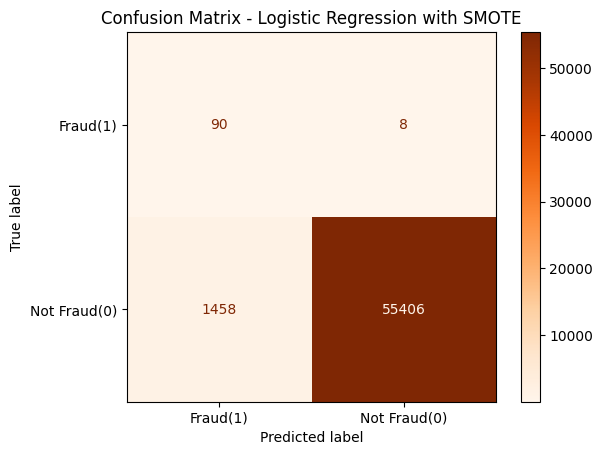

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# classification_report : Gives precision, recall, f1-score.
# confuson_matrix : Builds the confusion matrix from real vs predicted values.
# ConfusionMatrixDisplay : A tool to visualize the matrix as a chart



import matplotlib.pyplot as plt
# used to display the confusion matrix plot.

import warnings
warnings.filterwarnings("ignore")


smote = SMOTE(random_state = 42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
# x_train_smote : new training Features (balanced)
# y_train_smote : new training labels(equal number of 0s and 1s

print("After SMOTE oversampling")
print("Fraud(1):", sum(y_train_smote == 1))
print("Not Fraud(0):", sum(y_train_smote == 0))

log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote.fit(x_train_smote, y_train_smote)

y_pred_smote = log_reg_smote.predict(x_test)

cm = confusion_matrix(y_test, y_pred_smote, labels=[1,0])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fraud(1)", "Not Fraud(0)"])
disp.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix - Logistic Regression with SMOTE")
plt.show()

print(classification_report(y_test, y_pred_smote))
